In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.basemap import Basemap
from datetime import datetime

import sys
sys.path.append('../')

import utils
from nc_explorer import NcExplorer

In [3]:
work_dir = 'D:\\A1_JM\\D\\'
# work_dir = 'D:\processing\\'
point_file = 'points.txt'

In [4]:
snap_gc_points = pd.read_csv(work_dir+point_file, sep='\t', skiprows=(0,1,2,3,4))
snap_gc_points

,Name,X,Y,Lon,Lat,Delta Lon,Delta Lat,Label,Desc
0,gcp_2,4680.5,141.5,-58.149705,-2.985699,0.000734,0.001379,GCP 2,NaN
1,gcp_3,4403.5,312.5,-58.904525,-3.284106,0.000964,0.000208,GCP 3,NaN
2,gcp_4,4409.5,435.5,-58.960732,-3.606903,0.001058,0.000232,GCP 4,NaN
3,gcp_6,3934.5,420.5,-60.078984,-3.317089,0.000950,0.001626,GCP 6,NaN
4,gcp_7,3661.5,1446.5,-61.319945,-5.839723,0.001453,0.000439,GCP 7,NaN
5,gcp_8,4075.5,1797.5,-60.536226,-6.971325,0.003439,0.000921,GCP 8,NaN
6,gcp_9,2458.5,1598.5,-64.269349,-5.587854,0.002210,0.000398,GCP 9,NaN
7,gcp_10,2197.5,840.5,-64.441170,-3.479314,0.000512,0.000925,GCP 10,NaN
8,gcp_11,596.5,1133.5,-68.405969,-3.361451,0.000184,0.001097,GCP 11,NaN
9,gcp_12,2478.5,3384.5,-65.295901,-10.231528,0.003066,0.000447,GCP 12,NaN


In [5]:
# file_name = 'D:\\S3\\corrigir\\S3A_OL_1_EFR____20190830T140112_20190830T140412_20190831T183009_0179_048_338_3060_LN1_O_NT_002.SEN3'
file_name = 'D:\\S3\\corrigir\\S3B_OL_1_EFR____20200218T140249_20200218T140549_20200219T173507_0179_035_338_3060_LN1_O_NT_002.SEN3'

In [6]:
exp = NcExplorer(input_nc_folder=file_name, 
                 verbose=True)

Declaring class instance from: S3-FRBR:Nc_Explorer
Verbose set to True.


In [7]:
lon, lat = exp.get_lon_lat_from_nc()

S3-FRBR:Nc_Explorer.get_lon_lat_from_nc()

Extracting Lon/Lat dataframes from: 
D:\S3\corrigir\S3B_OL_1_EFR____20200218T140249_20200218T140549_20200219T173507_0179_035_338_3060_LN1_O_NT_002.SEN3

Longitude shape: (4091, 4865), size: 19902715
Latitude shape: (4091, 4865), size: 19902715

Done in 0h:0m:1s


In [8]:
valid_nc_band_names = exp.get_valid_band_files()
valid_nc_band_names

S3-FRBR:Nc_Explorer.get_valid_band_files()
Sentinel-3 Image folder:
D:\S3\corrigir\S3B_OL_1_EFR____20200218T140249_20200218T140549_20200219T173507_0179_035_338_3060_LN1_O_NT_002.SEN3
Total files in folder: 30
Total NetCDF files: 29
Total S3 "Oa" bands: 21



['Oa01_radiance.nc',
 'Oa02_radiance.nc',
 'Oa03_radiance.nc',
 'Oa04_radiance.nc',
 'Oa05_radiance.nc',
 'Oa06_radiance.nc',
 'Oa07_radiance.nc',
 'Oa08_radiance.nc',
 'Oa09_radiance.nc',
 'Oa10_radiance.nc',
 'Oa11_radiance.nc',
 'Oa12_radiance.nc',
 'Oa13_radiance.nc',
 'Oa14_radiance.nc',
 'Oa15_radiance.nc',
 'Oa16_radiance.nc',
 'Oa17_radiance.nc',
 'Oa18_radiance.nc',
 'Oa19_radiance.nc',
 'Oa20_radiance.nc',
 'Oa21_radiance.nc']

In [9]:
bands = exp.extract_data_from_netcdf_bands(valid_nc_band_names)

S3-FRBR:Nc_Explorer.extract_data_from_netcdf_bands()

extracting band: Oa01_radiance.nc -- 1 of 21
extracting band: Oa02_radiance.nc -- 2 of 21
extracting band: Oa03_radiance.nc -- 3 of 21
extracting band: Oa04_radiance.nc -- 4 of 21
extracting band: Oa05_radiance.nc -- 5 of 21
extracting band: Oa06_radiance.nc -- 6 of 21
extracting band: Oa07_radiance.nc -- 7 of 21
extracting band: Oa08_radiance.nc -- 8 of 21
extracting band: Oa09_radiance.nc -- 9 of 21
extracting band: Oa10_radiance.nc -- 10 of 21
extracting band: Oa11_radiance.nc -- 11 of 21
extracting band: Oa12_radiance.nc -- 12 of 21
extracting band: Oa13_radiance.nc -- 13 of 21
extracting band: Oa14_radiance.nc -- 14 of 21
extracting band: Oa15_radiance.nc -- 15 of 21
extracting band: Oa16_radiance.nc -- 16 of 21
extracting band: Oa17_radiance.nc -- 17 of 21
extracting band: Oa18_radiance.nc -- 18 of 21
extracting band: Oa19_radiance.nc -- 19 of 21
extracting band: Oa20_radiance.nc -- 20 of 21
extracting band: Oa21_radiance.nc -

In [10]:
query_lon, query_lat = -60.014493, -3.158980

mat_x_y, band_radiances = exp.get_point_data_in_bands(bands, lon, lat, query_lon, query_lat)

band_radiances

S3-FRBR:Nc_Explorer.get_point_data_in_bands()



[256.69077,
 290.04367,
 330.09555,
 348.53253,
 342.42755,
 318.99518,
 299.06342,
 291.1029,
 287.5865,
 282.98114,
 259.45126,
 254.62753,
 89.972595,
 146.84306,
 229.17723,
 236.61113,
 198.20493,
 191.2939,
 119.61276,
 30.551933,
 142.7327]

In [11]:
# start timer
utils.tic()

# declaring a empty list of dicts
rad_by_points = [{}]*len(snap_gc_points)

# loopt through every lon/lat point
for i,x in enumerate(snap_gc_points[['Lon','Lat']].iterrows()):
    # extracting the value in each s3 band by x-lon x-lat
    _, value_in_xy = exp.get_point_data_in_bands(bands, lon, lat, x[1][0], x[1][1])
    # updating the empty list with dynamicaly generated dictionaries
    rad_by_points[i] = {'Tag':i+1, 'Lon':x[1][0], 'Lat':x[1][1], 'Rad':value_in_xy}

# stop timer
t_hour, t_min, t_sec = utils.tac()
print(f'\nDone in {t_hour}h:{t_min}m:{t_sec}s')

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()

S3-FRBR:Nc_Explorer.get_point_data_in_bands()


Done in 0h:0m:7s


In [ ]:
rad_by_points

## Plotting NetCDF data with basemaps and matplotlib

In [12]:
bands.keys()

dict_keys(['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance'])

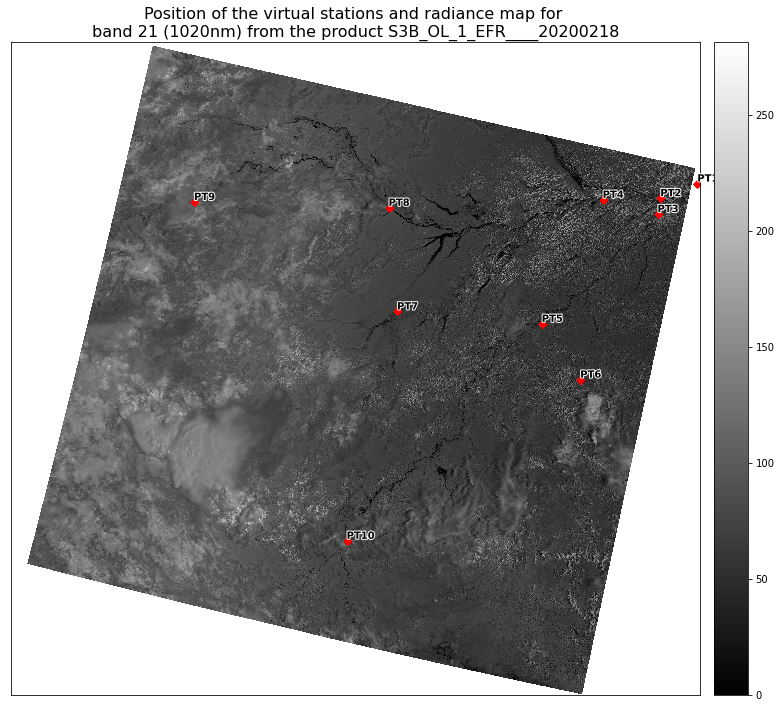


Done in 0h:0m:10s


In [13]:
prodname = os.path.basename(file_name).split('T')[0]

# start timer
utils.tic()

# Make this plot larger.
plt.figure(figsize=(16,12))

plt.title(f'Position of the virtual stations and radiance map for \nband 21 (1020nm) from the product {prodname}', fontsize=16)

# Miller projection:
m = Basemap(projection='mill',
            lat_ts=10,
            llcrnrlon=lon.min(),
            urcrnrlon=lon.max(),
            llcrnrlat=lat.min(),
            urcrnrlat=lat.max(),
            resolution='c')

x, y = m(lon, lat)

plot_var = bands['Oa21_radiance']

m.pcolormesh(x, y, plot_var, shading='flat', cmap=plt.cm.gray)

m.colorbar(location='right')

for i, coords in enumerate(snap_gc_points[['Lon','Lat']].iterrows()):
    xpt, ypt = m(coords[1][0],coords[1][1])
    m.plot(xpt, ypt, 'rD')
    txt = plt.text(xpt, ypt, f'PT{i+1}',fontsize=10,fontweight='bold',
                    ha='left',va='bottom',color='k')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])

plt.show()

# stop timer
t_hour, t_min, t_sec = utils.tac()
print(f'\nDone in {t_hour}h:{t_min}m:{t_sec}s')

## Ok, that looks nice. Let's repeate it for all the other bands.

In [ ]:
# start timer
utils.tic()

for band in bands:
    
    # Make this plot larger.
    plt.figure(figsize=(16,12))
    
    nm = exp.s3_bands_l1[band.split('_')[0]]

    plt.title(f'Position of the virtual stations and radiance map for \n'
              f'band {band} ({nm}nm) from the product S3A_OL_1_EFR 20190830T140112', fontsize=16)
    
    # Miller projection:
    m = Basemap(projection='mill',
                lat_ts=10,
                llcrnrlon=lon.min(),
                urcrnrlon=lon.max(),
                llcrnrlat=lat.min(),
                urcrnrlat=lat.max(),
                resolution='c')

    x, y = m(lon, lat)

    plot_var = bands[band]

    m.pcolormesh(x, y, plot_var, shading='flat', cmap=plt.cm.gray)

    m.colorbar(location='right')

    for i, coords in enumerate(snap_gc_points[['Lon','Lat']].iterrows()):
        xpt, ypt = m(coords[1][0],coords[1][1])
        m.plot(xpt, ypt, 'rD')
        txt = plt.text(xpt, ypt, f'PT{i+1}',fontsize=10,fontweight='bold',
                        ha='left',va='bottom',color='k')
        txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])

    plt.show()
    
# stop timer
t_hour, t_min, t_sec = utils.tac()
print(f'\nDone in {t_hour}h:{t_min}m:{t_sec}s')

## Now let's take a look at the actual data.

In [ ]:
rad_by_points[0]

In [ ]:
# change figure size in jupyter
plt.rcParams['figure.figsize'] = [12, 6] 
# https://matplotlib.org/3.1.3/users/dflt_style_changes.html#figure-size-font-size-and-screen-dpi


figure_title = f'Radiance by virtual station for product S3A_OL_1_EFR 20190830T140112' 
save_title = 'radbypoint'
band_radiances = rad_by_points[0]['Rad'] # blank sketch for twiny() axis filling
s3_bands_tick = exp.s3_bands_l1.values()
s3_bands_tick_label = exp.s3_bands_l1.keys()
# s3_bands_tick = exp.s3_bands_l2.values()
# s3_bands_tick_label = exp.s3_bands_l2.keys()


fig, ax1 = plt.subplots()
ax1.set_xlabel('Wavelenght (nm)')
ax1.set_ylabel('Radiance')
ax1.set_title(figure_title, y=1, fontsize=16)

for point in rad_by_points:
    ax1.plot(list(s3_bands_tick), point['Rad'], label='PT'+str(point['Tag']), marker='o')

ax1.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')
ax1.set_xticks(list(s3_bands_tick))
ax1.set_xticklabels(list(s3_bands_tick))
ax1.tick_params(labelrotation=90, labelsize='small')
ax1.legend()

ax2 = ax1.twiny()

ax2.plot(np.linspace(min(list(s3_bands_tick)),
                     max(list(s3_bands_tick)),
                     num=len(s3_bands_tick)), band_radiances, alpha=0.0)

ax2.set_xticks(list(s3_bands_tick))
ax2.set_xticklabels(list(s3_bands_tick_label))
ax2.tick_params(labelrotation=90, labelsize='xx-small')
ax2.set_title('Sentinel-3 Oa Bands', y=0.93, x=0.12, fontsize='xx-small')

plt.savefig(f'{save_title}.png',dpi=300)
plt.show()

## Extracting reflectance in several points for every L2-WFR image from 2020-02-16 to 2020-02-21

In [ ]:
# work_dir = 'D:\\processing\\test_data'
work_dir = 'D:\\processing\\campo_jm\\L2_WFR'

field_files = os.listdir(work_dir)

[print(f"{datetime.strptime(ff[16:31], '%Y%m%dT%H%M%S')} :: {ff}") for ff in field_files]

In [ ]:
exp = NcExplorer(verbose=True)

In [ ]:
point_file = 'D:\processing\points.txt'

snap_gc_points = pd.read_csv(point_file, sep='\t', skiprows=(0,1,2,3,4))
snap_gc_points

In [ ]:
# Manaus
# query_lon, query_lat = -60.014493, -3.158980

for n, imgfolder in enumerate(field_files):
    file_name = work_dir + '\\' + imgfolder
    print(n, file_name)

In [ ]:
reflectance_by_img = []

for n, imgfolder in enumerate(field_files):
    
    file_name = work_dir + '\\' + imgfolder
    
    print(f'Extracting NetCDF data for image folder --- {n+1}/{len(field_files)}')
    
    exp.nc_folder = file_name
    
    # extract LON/LAT matrices from the Sentinel-3 image folder
    lon, lat = exp.get_lon_lat_from_nc()

    # generate list of valid NetCDF Sentinel-3 bands
    valid_nc_band_names = exp.get_valid_band_files()

    # extract the actual data from the valid NetCDF band files
    bands = exp.extract_data_from_netcdf_bands(valid_nc_band_names)
    
    # declaring a empty list of dicts to accomodate the readings for each point
    reflectance_by_points = [{}]*len(snap_gc_points)

    # loopt through every lon/lat point
    for i,x in enumerate(snap_gc_points[['Lon','Lat']].iterrows()):
        print(f'Extracting information for point: {x[1][0]}/{x[1][1]}')
        # extracting the value in each s3 band by x-lon x-lat
        _, value_in_xy = exp.get_point_data_in_bands(bands, lon, lat, x[1][0], x[1][1])
        # updating the empty list with dynamicaly generated dictionaries
        reflectance_by_points[i] = {'Img':imgfolder[16:31], 'Point':i+1, 'Lon':x[1][0], 'Lat':x[1][1], 'Rad':value_in_xy}
    
    # appending the dict in a list for each image
    reflectance_by_img.append(reflectance_by_points)


In [ ]:
reflectance_by_img

## Generating plots for every image

In [ ]:
p01 = [ponto[0] for ponto in reflectance_by_img]
p02 = [ponto[1] for ponto in reflectance_by_img]
p03 = [ponto[2] for ponto in reflectance_by_img]
p04 = [ponto[3] for ponto in reflectance_by_img]
p05 = [ponto[4] for ponto in reflectance_by_img]
p06 = [ponto[5] for ponto in reflectance_by_img]
p07 = [ponto[6] for ponto in reflectance_by_img]
p08 = [ponto[7] for ponto in reflectance_by_img]
p09 = [ponto[8] for ponto in reflectance_by_img]
p10 = [ponto[9] for ponto in reflectance_by_img]

corrigir = [p01,p02,p03,p04,p05,p06,p07,p08,p09,p10]

In [ ]:
def custom_reflectance_plot(list_of_points, figure_title, s3_bands_tick, s3_bands_tick_label, save_title):
    
    # Generate a list of bools for each point, testing if the point is valid or a masked no-data.
    mask_list = [np.ma.is_masked(ponto['Rad'][0]) for ponto in list_of_points]
    
    # Generate a new list of points by dropping the masked points from the original list_of_points.
    clean_list = [ponto for (ponto, remove) in zip(list_of_points, mask_list) if not remove]
    
    # Break the execution of the function if the list_of_points is empty after the cleaning.
    if not clean_list:
      return print(f"List {figure_title} is empty")
    
    # change figure size in jupyter
    # https://matplotlib.org/3.1.3/users/dflt_style_changes.html#figure-size-font-size-and-screen-dpi
    plt.rcParams['figure.figsize'] = [12, 6] 
    

    fig = plt.figure()
    fig.show()
    ax1 = fig.add_subplot(111)
      
    ax1.set_xlabel('Wavelenght (nm)')
    ax1.set_ylabel('Reflectance')
    ax1.set_title(figure_title, y=1, fontsize=16)

    for point in clean_list:
        ax1.plot(s3_bands_tick, point['Rad'], label=point['Img'], marker='o')

    ax1.axhline(y=0, xmin=0, xmax=1, linewidth=0.5, color='black', linestyle='--')
    ax1.set_xticks(s3_bands_tick)
    ax1.set_xticklabels(s3_bands_tick)
    ax1.tick_params(labelrotation=90, labelsize='small')
    ax1.legend()

    ax2 = ax1.twiny()
    ax2.plot(s3_bands_tick, [0]*(len(s3_bands_tick)), alpha=0.0)
    ax2.set_xticks(s3_bands_tick)
    ax2.set_xticklabels(s3_bands_tick_label)
    ax2.tick_params(labelrotation=90, labelsize='xx-small')
    ax2.set_title('Sentinel-3 Oa Bands', y=0.93, x=0.12, fontsize='xx-small')

    plt.savefig(save_title, dpi=300)
    plt.show()

In [ ]:
# create a list with the value in (nm) of the 16 Sentinel-3 bands for L2 products.
s3bandstick = list(exp.s3_bands_l2.values())

# create a list with the name of the 16 Sentinel-3 bands for L2 products.
s3bandsticklabel = list(exp.s3_bands_l2.keys())

for i,px in enumerate(corrigir):
    custom_reflectance_plot(list_of_points=px, 
                            figure_title=f'WFR P{i+1}', 
                            s3_bands_tick = s3bandstick, 
                            s3_bands_tick_label = s3bandsticklabel,
                            save_title=f'P{i+1}.png')

## Generating a ms-excel spreadsheet from a pandas dataframe

In [ ]:
speadsheet = pd.DataFrame(corrigir)

speadsheet.to_excel('corrigir.xlsx', sheet_name='radiance', index=False)

In [ ]:
import pprint 

pp = pprint.PrettyPrinter(indent=4)

pp.pprint(corrigir)

In [ ]:
plt.scatter(bands['Oa21_reflectance'],bands['Oa10_reflectance'])

## Heatmap

In [ ]:
# https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set

In [ ]:
# import numpy as np
import numpy.random
# import matplotlib.pyplot as plt

x = bands['Oa21_reflectance']
y = bands['Oa10_reflectance']

yf = y.flatten()
xf = x.flatten()


# plt.hist2d(xf, yf, bins=10, cmap=plt.cm.jet)
plt.hexbin(xf, yf, bins=10, cmap=plt.cm.jet)
plt.axis([x.min(), x.max(), y.min(), y.max()])
# plt.axis([-0.02, 0.04, -0.04, 0.04]) # plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.xlabel("X: Oa21_reflectance")
plt.ylabel("Y: Oa10_reflectance")
plt.show()

# heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# plt.clf()
# plt.imshow(heatmap.T, extent=extent, origin='lower')
# plt.show()

In [ ]:
x = bands['Oa21_reflectance']
y = bands['Oa10_reflectance']

plt = np.histogram2d(x,y)